In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# In order to connect to our SQLite database, we need to use the create_engine() function. This function doesn't actually 
# connect to our database; it just prepares the database file to be connected to later on.
# This function will typically have one parameter, which is the location of the SQLite database file. Try this function 
# by adding the following line to your code.
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model. This means o transfer the contents of the database into a different 
# structure of data. 
# Automap Base creates a base class for an automap schema in SQLAlchemy. Basically, it sets up a foundation for us to 
# build on in SQLAlchemy, and by adding it to our code, it will help the rest of our code to function properly.
# In order for your code to function properly, you will need to add this line to your code:
Base = automap_base()

# reflect the tables with the prepare() function. By adding this code, we'll reflect the schema of our SQLite tables into 
# our code and create mappings. Add the following code to reflect the schema from the tables to our code:
Base.prepare(engine, reflect=True)

In [7]:
# Now that we've reflected our database tables, we can check out the classes we'll be creating with Automap.
# We can view all of the classes that Automap found
# We will double-check this by using Base.classes.keys(). This code references the classes that were mapped in each table.

#    Base.classes gives us access to all the classes.
#    keys() references all the names of the classes.

# Previously, we talked about decoupled systems in the SQLAlchemy ORM. This directly relates to the classes we have created
# here. These classes help keep our data separate, or decoupled. Keep in mind that our data is no longer stored in tables, 
# but rather in classes. The code we will run below enables us to essentially copy, or reflect, our data into different 
# classes instead of database tables.
Base.classes.keys()

['measurement', 'station']

In [8]:
# Module says above should have output of ['measurement', 'station']
# Save references to each table
# In order to reference a specific class, we use Base.classes.<class name>. For example, if we wanted to reference the 
# station class, we would use Base.classes.station.

# Since it can be rather cumbersome to type Base.classes every time we want to reference the measurement or station classes,
# we can give the classes new variable names. In this case, we will create new references for our Measurement class and 
# Station class. Add these new variables to your code:
#comment out the code; may not handle "restart and run all code" since already created
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB using code. First, we'll use an SQLAlchemy Session to query our database.
# Our session essentially allows us to query for data.
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set. We'll be creating a variable called prev_year and using the 
# datetime dependency that we imported previously. # The datetime dependency has a function called dt.date(), which 
# specifies the date in the following format: year, month, day.
# Add the most recent date, August 23, 2017, with the following code then add o do this, add the dt.timedelta() function 
# to the previous line of code. This function allows us to trace back a certain number of days. In this case, we want to go
# back 365 days. 
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# Start by creating a variable to store the results of the query we'll write. This code defines our new variable. Next, 
# let's add our session that we created earlier so that we can query our database. For this we'll use the session.query() 
# function, which is how we'll begin all of our queries in SQLAlchemy. From a bird's-eye view, this is how we query a 
# SQLite database using Python.
# This variable will be called results:
results = []

# results = session.query(Measurement.date, Measurement.prcp) commented out this code and added below modified code
# We still have a few aspects to add to our query, but we'll get to that shortly.

# Since we only want to see the most recent data, we need to filter out all of the data that is older than a year from the 
#last record date. We'll use the filter() function to filter out the data we don't need. Add the filter() function to the 
# existing query.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# print our results
print(results)

# print our results
# for result in results:
#        print(result)



[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# We'll start by creating a DataFrame variable, df, which we can use to save our query results.

# In order to save our results as a DataFrame, we need to provide our results variable as one parameter and specify the 
# column names as our second parameter. To do this, we will add the following line to our code:
df = pd.DataFrame(results, columns=['date','precipitation'])
# set the index to the date column
df.set_index(df['date'], inplace=True)

# Print the dataframe with the index
print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [12]:
# Print the dataframe without the index
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
2016-09-22           0.02
2016-09-23           0.00
2016-09-24           0.00
2016-09-25           0.00
2016-09-26           0.06
2016-09-27           0.02
2016-09-28           0.00
2016-09-29  

In [13]:
# Sort the dataframe by date
df = df.sort_index()

In [14]:
# print the sorted list
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

<IPython.core.display.Javascript object>


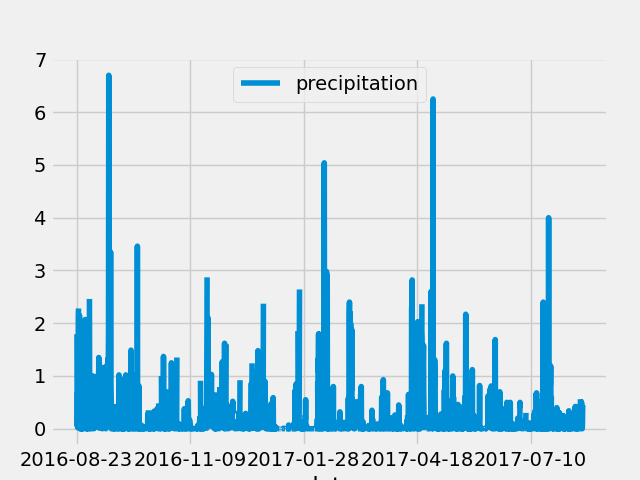

<AxesSubplot:xlabel='date'>

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [18]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.tobs)
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

# To run this code, you will need to add a print statement around it.
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [22]:
# To make the results easier to read, understand, and use, we'll put them in a DataFrame.
# To convert the results to a DataFrame, add the following to your code:
df = pd.DataFrame(results, columns=['tobs'])

# Add a print(df) statement after the last line and run the code
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


<IPython.core.display.Javascript object>


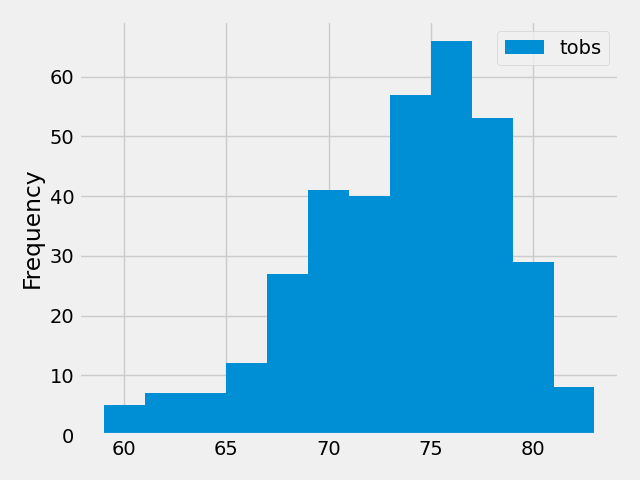

In [23]:
# Create a histogram from the temperature observations. This will allow us to quickly count how many temperature 
# observations we have. To create the histogram, we need to use the plot() function and the hist() function and add the 
# number of bins as a parameter. Add the following to your code:
df.plot.hist(bins=12)
# Using plt.tight_layout(), we can compress the x-axis labels so that they fit into the box holding our plot.
plt.tight_layout()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Referenced JWU047 "Climate_Analysis.ipynb" from GitHub.
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# For the trip
start = dt.date(2018, 1, 1)
end = dt.date(2018, 1, 7)

# Get range we want for last year, will be used for later
prev_year_start = start - dt.timedelta(days=365)
prev_year_end = end - dt.timedelta(days=365)

In [ ]:
# Need to define this step
tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"),
                             prev_year_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr = tmax-tmin
width = 1
fig, ax = plt.subplots(figsize=plt.figaspect(2))

bar = ax.bar(width, tmax, yerr=yerr, 
             alpha=0.5, color='coral', align='center')
ax.set(xticks=range(width), xticklabels='a', title='Trip Avg Temp', ylabel='Temp (F)')
fig.tight_layout()
ax.margins(0.2, 0.2)
fig.savefig("Images/jw_temperature.png")
fig.show()

In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# Include information
sel = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]
results = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= prev_year_start).\
    filter(Measurement.date <= prev_year_end).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print(results)

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Use pandas to create a range of dates for each day
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html
trip_dates = pd.date_range(start, end, freq='D')

# Stip off the year and save a list of %m-%d strings
trip_dates_months = trip_dates.strftime('%m-%d')

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in trip_dates_months:
    normals.append(*daily_normals(date))
normals

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_dates_df = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
trip_dates_df['date'] = trip_dates
trip_dates_df.set_index(['date'], inplace=True)
trip_dates_df.head()

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
trip_dates_df.plot(kind='area', stacked=False, alpha=0.2)
plt.tight_layout()
plt.savefig("Images/jw_daily_normals.png")

In [ ]:
def stats(start=None, end=None):
    """Return TMIN, TAVG, TMAX."""

    # Select statement
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]

    if not end:
        # calculate TMIN, TAVG, TMAX for dates greater than start
        results = session.query(*sel).\
            filter(Measurement.date >= start).all()
        # Unravel results into a 1D array and convert to a list
        temps = list(np.ravel(results))
        return temps

    # calculate TMIN, TAVG, TMAX with start and stop
    results = session.query(*sel).\
        filter(Measurement.date >= start).\
        filter(Measurement.date <= end).all()
    # Unravel results into a 1D array and convert to a list
    temps = list(np.ravel(results))
    return temps
stats('2012-02-28', '2013-03-05')

# Challenge